In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import fbeta_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
train = pd.read_csv("/content/train.csv")

In [142]:
train.fillna(0, inplace=True)

Поменяю классы местами, так как для меня целевой - невыжившие

In [143]:
train['Survived'] = 1 - train['Survived']

In [144]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [145]:
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train['Survived']

In [146]:
X['Sex'] = X['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [147]:
X['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [148]:
X = pd.get_dummies(X)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2, stratify=y)

In [150]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [151]:
lr = LogisticRegression()
lr.fit(X_train, y_train);
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


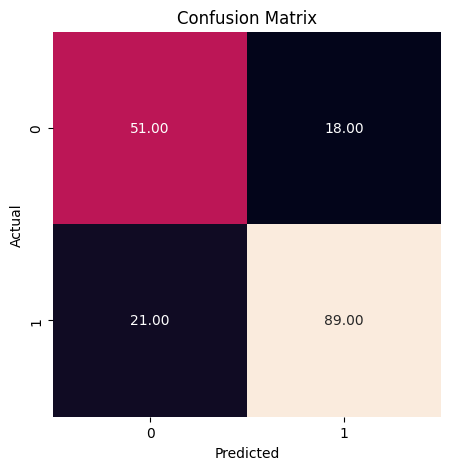

In [152]:
figsize = (5,5)

fig, ax = plt.subplots(figsize=figsize)
plt.title('Confusion Matrix')
hmap = sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, ax=ax, cbar=False, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [153]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

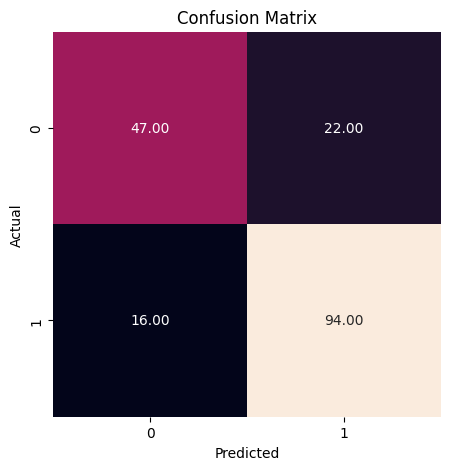

In [154]:
figsize = (5,5)

fig, ax = plt.subplots(figsize=figsize)
plt.title('Confusion Matrix')
hmap = sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, ax=ax, cbar=False, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Предположим, что для нас наиболее важным является предсказание того, что человек не выживет. Следовательно необходимо минимизировать предсказание класса 1, когда на самом деле ответом является 0

Я бы не стала брать Accuracy, так как наблюдается небольшой диcбаланс классов:

In [155]:
y.value_counts()

Survived
1    549
0    342
Name: count, dtype: int64

In [159]:
print(f'Accuracy для LR: {accuracy_score(y_test, y_pred_lr)}')
print(f'Accuracy для RF: {accuracy_score(y_test, y_pred_rf)}')

Accuracy для LR: 0.7821229050279329
Accuracy для RF: 0.7877094972067039


Presicion покажет нам, сколько из предсказанных невыживших действительно не выжили:

In [160]:
print(f'Presicion для LR: {precision_score(y_test, y_pred_lr)}')
print(f'Presicion для RF: {precision_score(y_test, y_pred_rf)}')

Presicion для LR: 0.8317757009345794
Presicion для RF: 0.8103448275862069


Мне кажется, что Recall - лучшая метрика в данном случае, так как она покажет, какую долю невыживших мы смогли бы определить. Нам важно не пропустить тот факт, что человек может не выжить:

In [161]:
print(f'Recall для LR: {recall_score(y_test, y_pred_lr)}')
print(f'Recall для RF: {recall_score(y_test, y_pred_rf)}')

Recall для LR: 0.8090909090909091
Recall для RF: 0.8545454545454545


Так как для нас важнее Recall, возьмем f1-betta меру и дадим больший вес нужной метрике:

In [162]:
print(f'F1-betta для LR: {fbeta_score(y_test, y_pred_lr, beta=2)}')
print(f'F1-betta для RF: {fbeta_score(y_test, y_pred_rf, beta=2)}')

F1-betta для LR: 0.8135283363802558
F1-betta для RF: 0.8453237410071941
